# Partecipanti al Gruppo:
Lorenzo Brizzi - S4865720

Lorenzo La Corte - S4784539

Davide Scarrà - S4798949

# Laboratorio 4: Apprendimento Non Supervisionato

In [1]:
import os
import numpy as np
import sklearn.datasets 
import matplotlib.pyplot as plt 
import random
from sklearn import preprocessing
import pandas as pd
from sklearn.cluster import KMeans

Oggi vediamo tecniche di machine learning non supervisionato.
Prima di tutto, generiamo dei dati sintetici, utilizzando una distribuzione gaussiana, che immaginiamo rappresenti una caratteristica estratta da un qualche dataset. 

La funzione da utilizzare e':

    sklearn.datasets.make_blobs
  
Quindi, generate per il momento 4 cluster.

In [2]:
from sklearn.datasets import make_blobs

num_elements =  100
n_features = 2 # consideriamo dati bidimensionali
centers = [(-7, 0), (0, 0), (0, 8), (9, 3)]

# codice qui per generare i dati (usate la documentazione su make_blobs)
X, y = make_blobs(n_samples=num_elements, centers=centers, n_features=n_features)

# X sono i dati generati
# y sono le label delle entry della matrice X

ora plottiamo il dataset da noi generato, usando un grafico a dispersione. 
Riuscite a rappresentare ogni cluster con un colore diverso?

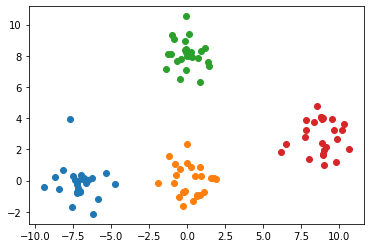

In [3]:
#codice qui 
for i in range(4):
    # prendo X della classe i, sulle ascisse per i valori di sx della matrice, sulle ordinate per i valori di dx
    plt.scatter(X[np.where(y==i),0], X[np.where(y==i),1]) # prendo mano a mano i dati dai diversi cluster

Adesso, supponiamo di non conoscere le label. Quindi, dimentichiamo il vettore y. (**in questo modo lo rendiamo NON SUPERVISIONATO**)

In [4]:
y=[] # azzeriamo il vettore y in modo da renderlo non supervisionato

# K-Means

Riusciamo ad utilizzare un algoritmo di machine learning che permetta di associare i dati in base alla similarita'? 
possiamo usare un algoritmo di k-means. 
Quindi, proviamo ad implementarlo insieme.
Cominciamo con un caso semplice, passando i centroidi che abbiamo usato per la generazione.
Scriviamo una funzione:

    def k_means(centroids, X, max_iter):
    return y

            

## Definizione dell'Algoritmo

Siccome i centroidi li conosciamo (e questa è una super semplificazione), li usiamo.
Dobbiamo seguire il seguente algoritmo:

1. Calcoliamo la distanza di tutti i punti dai nostri centroidi, assegnando ciascun punto a quello piu' vicino;
2. Calcoliamo i nuovi centroidi, come media dei punti assegnati a ciascun cluster;
3. Iteriamo il procedimento fino a max_iter. 
4. Ritorniamo i cluster ottenuti.


Scriviamo una funzione per il punto 1.

tip. possiamo usare la funzione np.linalg.norm, considerando che la distanza euclidea corrisponde alla norma 2 della differenza tra due punti. 

In [5]:
def return_distances(x,centroids):
    distances = np.zeros((x.shape[0],len(centroids)))
    
    #codice qui
    for i in range(0,x.shape[0]):
        
        for j in range(0,len(centroids)):

            # devo calcolare la distanza tra il punto i e il centroide j
            distances[i,j] = np.linalg.norm((x[i]-centroids[j]))

    return distances

In [6]:
def k_means(X,max_iter, centroids = None):
    
    for i in range(0,max_iter):

        distances = return_distances(X,centroids)

        # a questo punto guardo qual'è il minimo della riga
        y_pred = np.argmin(distances, axis=1)
        
        for c in range(0,len(centroids)):
            centroids[c] = np.mean(X[y_pred==c],axis=0)
    
    return y_pred, centroids

In [7]:
y,centroids = k_means(X,10,np.asarray(centers))

ora rappresentiamo quanto abbiamo trovato, e vediamo se il nostro algoritmo ha avuto successo

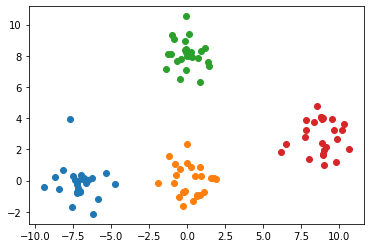

In [8]:
#codice qui 
for i in range(4):
    plt.scatter(X[np.where(y==i),0], X[np.where(y==i),1])

adesso riscriviamo la funzione, usando centroidi random. 
Usiamo la funzione:
    random.uniform(min,max)
per generare i centroidi. Possiamo usare come range, il minimo e il massimo di ogni feature. 

In [9]:
def k_means(X,max_iter,num_clusters):
    centroids = np.zeros((4,X.shape[1]),dtype='float')
    
    # generazione dei centroidi
    for i in range(0,num_clusters):
        for j in range(0,X.shape[1]):

            centroids[i,j] = (random.uniform(np.min(X[:, j]),np.max(X[:, j])))

    #classico kmeans
    for i in range(0,max_iter):
        distances = return_distances(X,centroids)
        y_pred = np.argmin(distances,axis=1)
        for c in range(0,len(centroids)):
                centroids[c] = np.mean(X[y_pred==c],axis=0)
               
    return y_pred,centroids 

verifichiamo ora il funzionamento

In [10]:
y,centroids = k_means(X,10,4)

(4, 2)


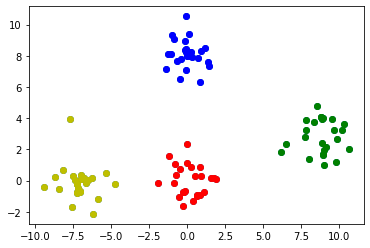

In [11]:
print(np.asarray(centroids).shape)
plt.scatter(X[:,0],X[:,1])
color = ['r','b','y','g']
for i in range(0,4):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1],color=color[i])

Provate a runnare diverse volte, e traete qualche conclusione.

Potevamo usare direttamente la funzione KMeans messa a disposizione da scikit-learn.

(4, 2)


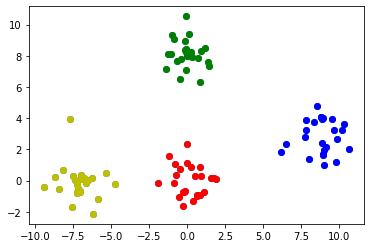

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y=  kmeans.labels_ # sono i cluster a cui ciascun punto è stato assegnato

print(np.asarray(centroids).shape)
plt.scatter(X[:,0],X[:,1])
color = ['r','b','y','g']
for i in range(0,4):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1],color=color[i])

# Coefficiente di Silhouette
## Procedimento senza conoscere il numero dei Cluster

Abbiamo usato 4 cluster, perchè conosciamo già il numero (abbiamo generato noi il dataset). **Ma se non lo conoscessimo?** 
Vediamo insieme questa implementazione. Abbiamo usato il *silhouette score* di scikit_learn.

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette(x):
  silhouette_avg = []
  for i in range(2, 11):
      kmeans = KMeans(n_clusters = i, max_iter = 20, random_state = 0)
      cluster_labels = kmeans.fit_predict(x)
      silhouette_avg.append(silhouette_score(x, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
  plt.plot(range(2, 11), silhouette_avg,'-o')
  plt.title('The silhouette method')
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette coefficient') #within cluster sum of squares
  plt.show()

vediamo ora il risultato!

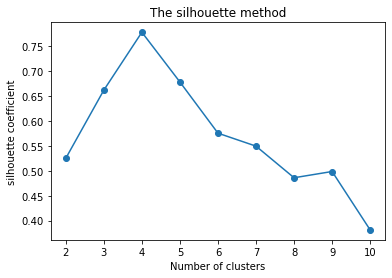

In [14]:
#codice qui 
silhouette(X)

Ci risulta proprio che 4 sono i cluster adatti.

# Un Dataset Reale

Ora ci spostiamo su un vero dataset. 

Il dataset iris racchiude caratteristiche di petalo e sepalo di diverse specie di iris. 

Carichiamo il dataset e, al solito, estraiamo informazioni di base. 

In [15]:
#codice qui 
iris = pd.read_csv('Iris.csv') 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Verifichiamo quante diverse specie di iris siano incluse nel dataset 

In [16]:
#codice qui
species = np.unique(iris['Species'])

print(species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


**Ci sono 3 diverse specie.**

## Grafico a dispersione per le diverse specie

Ok, ora proviamo a rappresentare su un grafico a dispersione le diverse specie, considerando, per visualizzazione, solo due di queste features. 

*SepalLengthCm* e *PetalLengthCm*

Provate a trovare un modo per rappresentare le varie specie con colori diversi. 

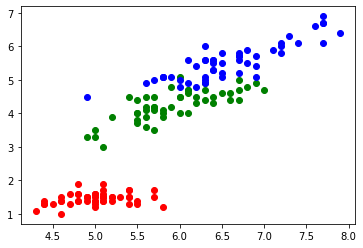

In [17]:
color = ['r','g','b']

#codice qui 
for i in range(0, len(species)):
    plt.scatter(iris['SepalLengthCm'][np.where(iris['Species']==species[i])[0]], iris['PetalLengthCm'][np.where(iris['Species']==species[i])[0]], color=color[i])

## Approccio non Supervisionato

Ora verifichiamo se sia possibile usare un approccio non supervisionato per ritrovare le 3 specie. 

Prima di tutto, costruiamo un array X che useremo come input per il Kmeans, considerando le 4 caratteristiche a disposizione

In [18]:
#codice qui per costruire X dal dataframe 
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X = np.asarray(X)

Prima di tutto standardizziamo il dato.

In [19]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Quindi usiamo il KMeans di scikit-learn per fittare i nostri dati, e predire le species. Usiamo 3 cluster.

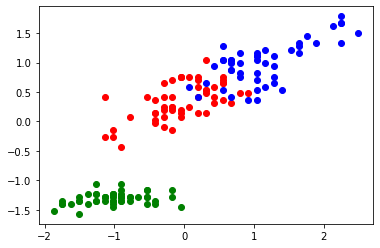

In [20]:
#codice qui per kmeans 
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)
y = kmeans.labels_

for i in range(0,3):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),2], color = color[i])

# Un altro Dataset

Bene! proviamo a fare qualcosa di simile, usando un altro dataset. Il dataset housing, racchiude informazioni circa la vendita e le caratteristiche di abitazioni in california. 

In [21]:
#codice qui 
house = pd.read_csv('housing.csv') 
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Ora, selezioniamo soltanto le colonne longitude, latitude e median income. In sostanza, vogliamo utilizzare il learning non supervisionato per dividere le regioni della california in base a questi tre parametri. 
Usiamo un numero di cluster uguale a 6 per questo esercizio. 

In [22]:
#codice qui
X = house[['longitude','latitude','median_income']]
X = np.asarray(X)

standardizziamo il dataset

In [23]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Runnate quindi un KMeans usando la libreria sklearn, con 6 cluster e sul dataset appena creato. 

In [27]:
kmeans = KMeans(n_clusters = 6, random_state = 0).fit(X)
y=  kmeans.labels_

visualizziamo i cluster identificati usando longitudine e latitudine 

(4, 2)


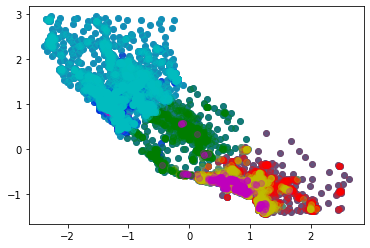

In [32]:
plt.scatter(X[:,0],X[:,1])
print(np.asarray(centroids).shape)
color = ['r','b','y','g','m','c']
for i in range(0,6):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1],color=color[i],alpha=0.3)

Osserviamo che i punti di maggior ricchezza corrispondo ai dintorni di Los Angeles e la silicon valley.

# Box Plot

La variabile di output del nostro dataset è il costo mediano delle case. Quindi, una buona idea per valutare il nostro clustering è di visualizzare con un opportuna modalità, la variabile median_house_value in base ai cluster trovati.

1. Prima di tutto, creiamo una colonna cluster nel dataframe, riportando i cluster stimati dal kmeans;
  - quindi dobbiamo predire X usando il kmeans 
2. Visualizziamo il median_house_value in base al cluster. 


Siamo riusciti a separare i nostri dati rispetto a questa variabile?

<AxesSubplot:title={'center':'median_house_value'}, xlabel='Cluster'>

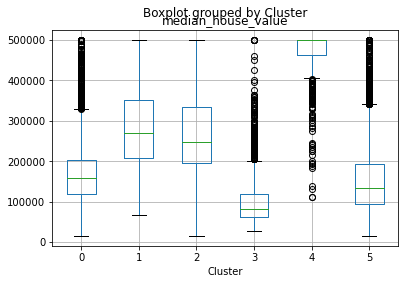

In [33]:
#codice qui 
house["Cluster"] = kmeans.predict(X)
house.boxplot(column='median_house_value', by='Cluster')